In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [69]:
df_orig = pd.read_csv("data/characteristic_2.csv")

In [70]:
# Calculate daily sales
df_orig["Daily Sales"] = df_orig["Total Sales"].diff().fillna(0)
df_orig

,Total Sales,Date,Daily Sales
0,0,9/9/2024,0.0
1,27,9/11/2024,27.0
2,200,9/12/2024,173.0
3,5715,9/17/2024,5515.0
4,11840,9/24/2024,6125.0
...,...,...,...
131,25558,2/9/2025,-18.0
132,25484,2/10/2025,-74.0
133,25281,2/11/2025,-203.0
134,25281,2/12/2025,0.0


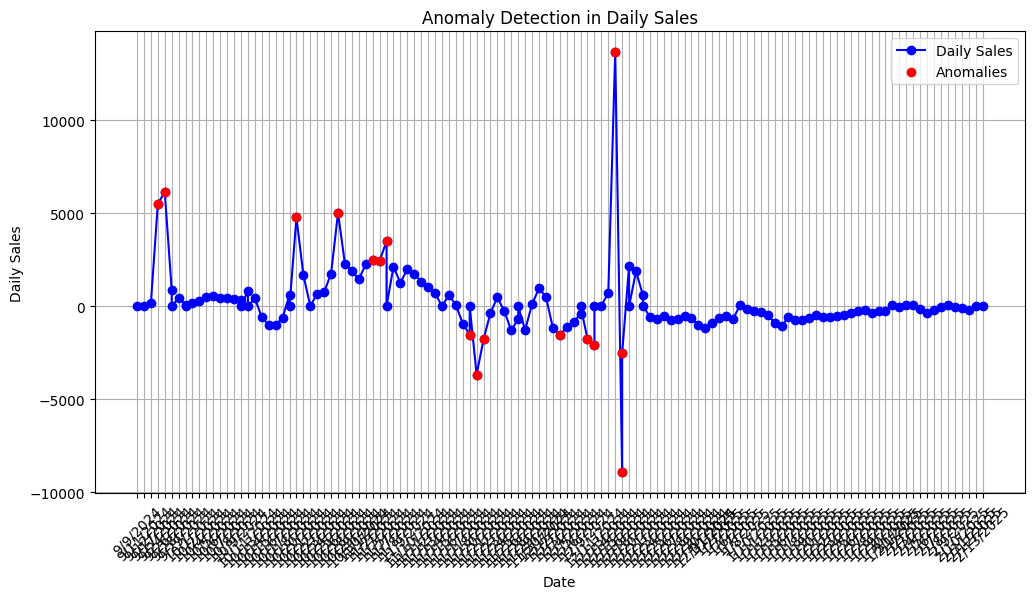

,Total Sales,Date,Daily Sales,Anomaly
3,5715,9/17/2024,5515.0,-1
4,11840,9/24/2024,6125.0,-1
28,19686,10/20/2024,4771.0,-1
34,29577,10/26/2024,5021.0,-1
39,39933,11/2/2024,2496.0,-1
40,42374,11/3/2024,2441.0,-1
41,45860,11/5/2024,3486.0,-1
54,54210,11/18/2024,-1529.0,-1
56,50536,11/20/2024,-3674.0,-1
57,48747,11/21/2024,-1789.0,-1


In [71]:
# Use Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination="auto", random_state=314)
df_orig["Anomaly"] = iso_forest.fit_predict(df_orig[["Daily Sales"]])

# Identify anomalies (-1 means anomaly, 1 means normal)
anomalies = df_orig[df_orig["Anomaly"] == -1]

# Plot original Daily Sales with anomalies highlighted
plt.figure(figsize=(12, 6))
plt.plot(df_orig["Date"], df_orig["Daily Sales"], marker="o", linestyle="-", label="Daily Sales", color="b")
plt.scatter(anomalies["Date"], anomalies["Daily Sales"], color="r", label="Anomalies", zorder=3)

# Labels and title
plt.xlabel("Date")
plt.ylabel("Daily Sales")
plt.title("Anomaly Detection in Daily Sales")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.show()

# Display detected anomalies
anomalies

In [72]:
# Interpolate values for anomalies
anomaly_indices = df_orig[df_orig["Anomaly"] == -1].index

if not anomaly_indices.empty:
    # Replace anomaly sales values with NaN
    df_orig.loc[anomaly_indices, "Daily Sales"] = pd.NA
    
    # Use linear interpolation
    df_orig["Daily Sales"] = df_orig["Daily Sales"].interpolate()
    
    #If first row is anomaly, use backward fill only for the first row if needed.
    if pd.isna(df_orig.loc[0, "Daily Sales"]) and 0 in anomaly_indices:
        df_orig["Daily Sales"] = df_orig["Daily Sales"].bfill()

In [73]:
anomalies = df_orig[df_orig["Anomaly"] == -1]
anomalies

,Total Sales,Date,Daily Sales,Anomaly
3,5715,9/17/2024,404.666667,-1
4,11840,9/24/2024,636.333333,-1
28,19686,10/20/2024,839.000000,-1
34,29577,10/26/2024,2013.000000,-1
39,39933,11/2/2024,1689.750000,-1
40,42374,11/3/2024,1126.500000,-1
41,45860,11/5/2024,563.250000,-1
54,54210,11/18/2024,-466.500000,-1
56,50536,11/20/2024,-117.666667,-1
57,48747,11/21/2024,-235.333333,-1


In [74]:
df_orig

,Total Sales,Date,Daily Sales,Anomaly
0,0,9/9/2024,0.000000,1
1,27,9/11/2024,27.000000,1
2,200,9/12/2024,173.000000,1
3,5715,9/17/2024,404.666667,-1
4,11840,9/24/2024,636.333333,-1
...,...,...,...,...
131,25558,2/9/2025,-18.000000,1
132,25484,2/10/2025,-74.000000,1
133,25281,2/11/2025,-203.000000,1
134,25281,2/12/2025,0.000000,1


In [75]:
# Interpolate values for daily sales that are negative
negative_diff_indices = df_orig[df_orig["Daily Sales"] < 0].index

if not negative_diff_indices.empty:
    # Replace negative difference sales values with NaN.
    df_orig.loc[negative_diff_indices, "Daily Sales"] = pd.NA

    # Use linear interpolation
    df_orig["Daily Sales"] = df_orig["Daily Sales"].interpolate()

    # Handle the first row edge case
    if pd.isna(df_orig.loc[0, "Daily Sales"]) and 1 in negative_diff_indices:
        df_orig["Daily Sales"] = df_orig["Daily Sales"].bfill()

In [76]:
df_orig

,Total Sales,Date,Daily Sales,Anomaly
0,0,9/9/2024,0.000000,1
1,27,9/11/2024,27.000000,1
2,200,9/12/2024,173.000000,1
3,5715,9/17/2024,404.666667,-1
4,11840,9/24/2024,636.333333,-1
...,...,...,...,...
131,25558,2/9/2025,66.750000,1
132,25484,2/10/2025,44.500000,1
133,25281,2/11/2025,22.250000,1
134,25281,2/12/2025,0.000000,1


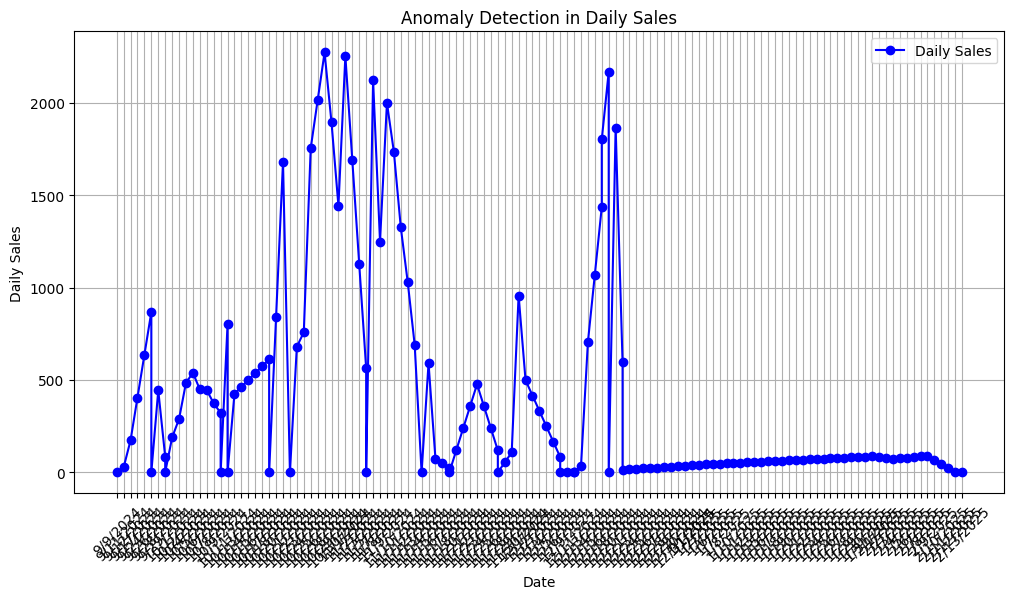

In [77]:
# Plot original Total Sales with anomalies highlighted
plt.figure(figsize=(12, 6))
plt.plot(df_orig["Date"], df_orig["Daily Sales"], marker="o", linestyle="-", label="Daily Sales", color="b")

# Labels and title
plt.xlabel("Date")
plt.ylabel("Daily Sales")
plt.title("Anomaly Detection in Daily Sales")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.show()

In [78]:
# Drop the Anomaly column
df_orig.drop(columns=["Anomaly"], inplace=True)

# Make Daily Sales integer
df_orig["Daily Sales"] = df_orig["Daily Sales"].astype(int)

df_orig

,Total Sales,Date,Daily Sales
0,0,9/9/2024,0
1,27,9/11/2024,27
2,200,9/12/2024,173
3,5715,9/17/2024,404
4,11840,9/24/2024,636
...,...,...,...
131,25558,2/9/2025,66
132,25484,2/10/2025,44
133,25281,2/11/2025,22
134,25281,2/12/2025,0


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [80]:
# Load the data
df = pd.read_csv("data/characteristic_2.csv")
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")
df = df.drop_duplicates(subset="Date", keep="first")
df = df.sort_values("Date")

In [81]:
# Compute delta/daily sales
df["Daily Sales"] = df["Total Sales"].diff().fillna(0)

In [82]:
# Detect anomalies
# Negatives
negatives = df["Daily Sales"] < 0
print(f"Found {negatives.sum()} negative anomalies")

# High Spikes (3σ threshold on positive deltas)
positive_deltas = df["Daily Sales"][df["Daily Sales"] > 0]
mean_pos = positive_deltas.mean()
std_pos = positive_deltas.std()
spike_threshold = mean_pos + 3 * std_pos
spikes = df["Daily Sales"] > spike_threshold
print(f"Found {spikes.sum()} spike anomalies (> {spike_threshold:.0f})")

# Combine anomalies
anomalies = negatives | spikes
print(f"Total anomalies to fix: {anomalies.sum()}")

Found 64 negative anomalies
Found 1 spike anomalies (> 8099)
Total anomalies to fix: 65


In [83]:
# Replace anomalies with interpolation
df_corrected = df.copy()
df_corrected.loc[anomalies, "Daily Sales"] = np.nan
df_corrected["Daily Sales"] = df_corrected["Daily Sales"].interpolate(method="linear", limit_direction="forward")

In [84]:
# Fill missing dates
full_dates = pd.date_range(start=df["Date"].min(), end=df["Date"].max(), freq="D")
df_full = df_corrected.set_index("Date").reindex(full_dates).reset_index()
df_full = df_full.rename(columns={"index": "Date"})

In [85]:
# Fill remaining daily sales with average
df_final = df_full.copy()
for i in range(1, len(df_final)):
    if pd.isna(df_final.loc[i, "Daily Sales"]):
        start_idx = i - 1
        end_idx = i
        while end_idx < len(df_final) and pd.isna(df_final.loc[end_idx, "Daily Sales"]):
            end_idx += 1
        if end_idx < len(df_final):
            gap_size = end_idx - start_idx
            next_known_delta = df_final.loc[end_idx, "Daily Sales"]
            avg_delta = next_known_delta / gap_size if gap_size > 1 else next_known_delta
            for j in range(start_idx + 1, end_idx):
                df_final.loc[j, "Daily Sales"] = avg_delta

df_final["Daily Sales"] = df_final["Daily Sales"].fillna(0)


Sample of final data:
        Date  Total Sales  Daily Sales
0 2024-09-09          0.0          0.0
1 2024-09-10          NaN         13.5
2 2024-09-11         27.0         27.0
3 2024-09-12        200.0        173.0
4 2024-09-13          NaN       1103.0
5 2024-09-14          NaN       1103.0
6 2024-09-15          NaN       1103.0
7 2024-09-16          NaN       1103.0
8 2024-09-17       5715.0       5515.0
9 2024-09-18          NaN        875.0

Negative Daily Sales remaining: 0
Max Daily Sales: 6125.0


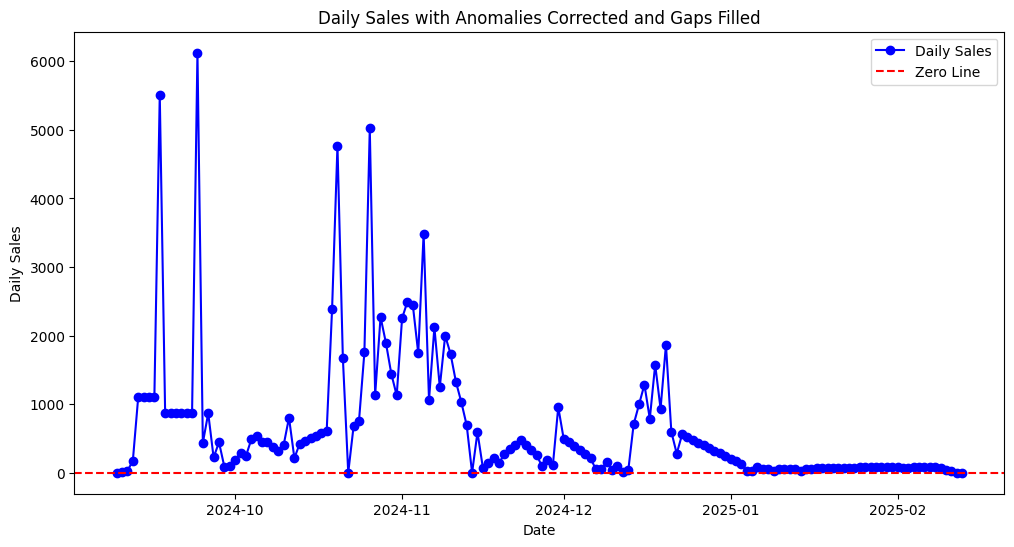

In [86]:
# Results
print("\nSample of final data:")
print(df_final[["Date", "Total Sales", "Daily Sales"]].head(10))
print(f"\nNegative Daily Sales remaining: {(df_final["Daily Sales"] < 0).sum()}")
print(f"Max Daily Sales: {df_final["Daily Sales"].max()}")

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(df_final["Date"], df_final["Daily Sales"], marker="o", label="Daily Sales", color="blue")
plt.axhline(0, color="red", linestyle="--", label="Zero Line")
plt.title("Daily Sales with Anomalies Corrected and Gaps Filled")
plt.xlabel("Date")
plt.ylabel("Daily Sales")
plt.legend()
plt.show()

Isolation Forest anomalies: 22
Negative anomalies: 12
Total anomalies: 24


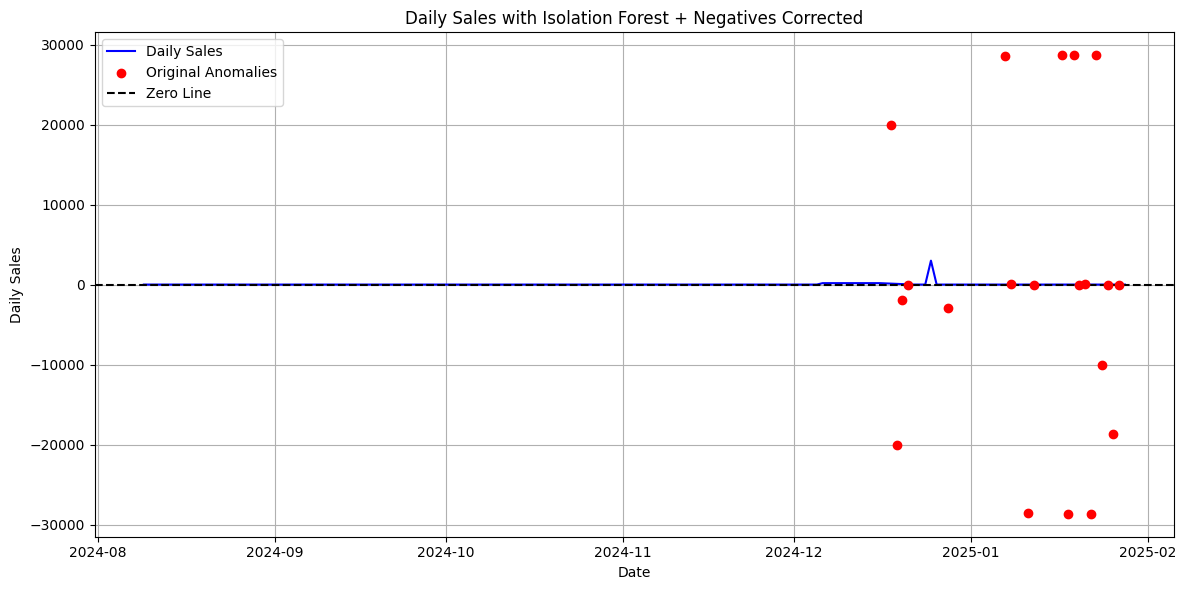


Sample of final data:
        Date  Total Sales  Daily Sales
0 2024-08-09        678.0     0.000000
1 2024-08-10          NaN     0.333333
2 2024-08-11          NaN     0.333333
3 2024-08-12        679.0     0.333333
4 2024-08-13          NaN     0.508772
5 2024-08-14          NaN     0.508772
6 2024-08-15          NaN     0.508772
7 2024-08-16          NaN     0.508772
8 2024-08-17          NaN     0.508772
9 2024-08-18          NaN     0.508772
Negatives remaining: 0
Max Daily Sales: 2990.0

Original anomalies (sample):
         Date  Daily Sales
13 2024-12-18      20000.0
14 2024-12-19     -20000.0
15 2024-12-20      -1960.0
16 2024-12-21          1.0
21 2024-12-28      -2990.0


In [87]:
# Load the data
df = pd.read_csv("data/characteristic_6.csv")
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")
df = df.drop_duplicates(subset="Date", keep="first").sort_values("Date")

# Compute daily sales/delta
df["Daily Sales"] = df["Total Sales"].diff().fillna(0)

# Fill missing dates
full_dates = pd.date_range(start=df["Date"].min(), end=df["Date"].max(), freq="D")
df_full = df.set_index("Date").reindex(full_dates).reset_index()
df_full = df_full.rename(columns={"index": "Date"})

# Fill gaps in daily sales by averaging deltas
df_final = df_full.copy()
for i in range(1, len(df_final)):
    if pd.isna(df_final.loc[i, "Total Sales"]) or (i == len(df_final)-1):
        start_idx = i - 1
        while start_idx >= 0 and pd.isna(df_final.loc[start_idx, "Total Sales"]):
            start_idx -= 1
        if start_idx < 0:
            start_idx = 0
        end_idx = i
        while end_idx < len(df_final) and pd.isna(df_final.loc[end_idx, "Total Sales"]):
            end_idx += 1
        if end_idx < len(df_final):
            start_value = df_final.loc[start_idx, "Total Sales"]
            end_value = df_final.loc[end_idx, "Total Sales"]
            if not pd.isna(start_value) and not pd.isna(end_value):
                total_delta = end_value - start_value
                gap_size = end_idx - start_idx
                avg_delta = total_delta / gap_size
                for j in range(start_idx + 1, end_idx + 1):
                    df_final.loc[j, "Daily Sales"] = avg_delta

df_final["Daily Sales"] = df_final["Daily Sales"].fillna(0)

# Feature engineering for IsolationForest
df_final["Lag1"] = df_final["Daily Sales"].shift(1).fillna(0)
df_final["Rolling_Mean"] = df_final["Daily Sales"].rolling(window=3, min_periods=1).mean().fillna(0)
features = df_final[["Daily Sales", "Lag1", "Rolling_Mean"]]

# Detect anomalies with IsolationForest
iso_forest = IsolationForest(contamination="auto", random_state=314)
df_final["Anomaly_Score"] = iso_forest.fit_predict(features)
iso_anomalies = df_final["Anomaly_Score"] == -1

# Explicitly flag negatives
negatives = df_final["Daily Sales"] < 0
anomalies = iso_anomalies | negatives

print(f"Isolation Forest anomalies: {iso_anomalies.sum()}")
print(f"Negative anomalies: {negatives.sum()}")
print(f"Total anomalies: {anomalies.sum()}")

# Interpolate all anomalous daily sales
df_final.loc[anomalies, "Daily Sales"] = np.nan
df_final["Daily Sales"] = df_final["Daily Sales"].interpolate(method="linear")
df_final["Daily Sales"] = df_final["Daily Sales"].fillna(0)

# Vis
anomaly_dates = df_final[anomalies]["Date"]
original_anomalies = df[df["Date"].isin(anomaly_dates)][["Date", "Daily Sales"]]

plt.figure(figsize=(12, 6))
plt.plot(df_final["Date"], df_final["Daily Sales"], label="Daily Sales", color="blue")
plt.scatter(original_anomalies["Date"], original_anomalies["Daily Sales"], 
            color="red", label="Original Anomalies", zorder=5)
plt.axhline(0, color="black", linestyle="--", label="Zero Line")
plt.title("Daily Sales with Isolation Forest + Negatives Corrected")
plt.xlabel("Date")
plt.ylabel("Daily Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print sample and stats
print("\nSample of final data:")
print(df_final[["Date", "Total Sales", "Daily Sales"]].head(10))
print(f"Negatives remaining: {(df_final["Daily Sales"] < 0).sum()}")
print(f"Max Daily Sales: {df_final["Daily Sales"].max()}")
print("\nOriginal anomalies (sample):")
print(original_anomalies.head())